<center><h1 style="font-size:3em"> COVID-19 au Sénégal </h1></center>

In [1]:
# Base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

La table de donnée ci-dessous a été contruite à partir des tweets du Ministère de la Santé et de l'Action Sociale du Sénégal. La source peut être trouvée ici: https://twitter.com/MinisteredelaS1

# I. Imports

In [19]:
df = pd.read_csv("COVID_Dakar.csv", sep=";")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head(10)

,Date,Positif,Negatif,Age,Homme,Femme,Décédé,Guéri,Nationalité,Resident Senegal,Ville,Facteur,Source/Voyage,Hopital,Temps Hospitalisation (j)
0,2020-03-02,1,0,68.0,1.0,0.0,0.0,1.0,France,Oui,Dakar,Importé,France,FANN,4.0
1,2020-03-03,0,1,NaN,1.0,0.0,0.0,0.0,Gambie,Non,Dakar,Importé,Espagne,FANN,NaN
2,2020-03-03,1,0,80.0,1.0,0.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,10.0
3,2020-03-04,1,0,68.0,0.0,1.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,15.0
4,2020-03-04,1,0,33.0,0.0,1.0,0.0,1.0,Angleterre,Non,Dakar,Importé,Angleterre,FANN,7.0
5,2020-03-06,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dakar,NaN,NaN,NaN,NaN
6,2020-03-06,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dakar,NaN,NaN,NaN,NaN
7,2020-03-07,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dakar,NaN,NaN,NaN,NaN
8,2020-03-07,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dakar,NaN,NaN,NaN,NaN
9,2020-03-08,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dakar,NaN,NaN,NaN,NaN


# II. Exploration

## 1. Statistiques

In [41]:
evol_cases = df[['Date', 'Positif', 'Negatif', 'Décédé', 'Guéri']].groupby("Date").sum().cumsum()
evol_cases.head()

,Positif,Negatif,Décédé,Guéri
Date,,,,
2020-03-02,1.0,0.0,0.0,1.0
2020-03-03,2.0,1.0,0.0,2.0
2020-03-04,4.0,1.0,0.0,4.0
2020-03-06,4.0,3.0,0.0,4.0
2020-03-07,4.0,5.0,0.0,4.0


In [42]:
total_positif = evol_cases.tail(1)['Positif'][0]
total_negatif = evol_cases.tail(1)['Negatif'][0]
total_decede = evol_cases.tail(1)['Décédé'][0]
total_geuri = evol_cases.tail(1)['Guéri'][0]
print("Nombre de cas positifs: ", total_positif)
print("Nombre de cas negatifs: ", total_negatif)
print("Nombre de décès: ", total_decede)
print("Nombre de guérisons: ", total_geuri)

Nombre de cas positifs:  47.0
Nombre de cas negatifs:  159.0
Nombre de décès:  0.0
Nombre de guérisons:  5.0


## 2. Evolution du nombre de cas

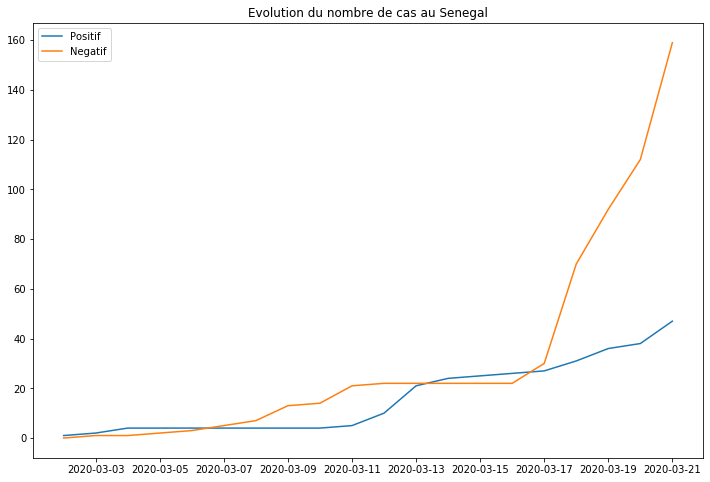

In [21]:
plt.figure(figsize=(12,8))
plt.plot(evol_cases['Positif'], label="Positif")
plt.plot(evol_cases['Negatif'], label="Negatif")
plt.legend()
plt.title("Evolution du nombre de cas au Senegal")
plt.show()

## 2. Age

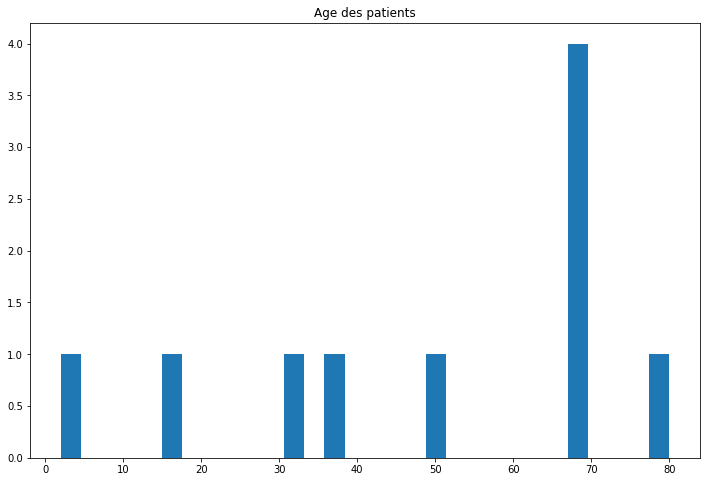

In [26]:
plt.figure(figsize=(12,8))
plt.hist(df['Age'].dropna(), bins=30)
plt.title("Age des patients")
plt.show()

## 3. Sexe

In [56]:
df[['Homme', 'Femme']].dropna().sum()

Homme    9.0
Femme    4.0
dtype: float64

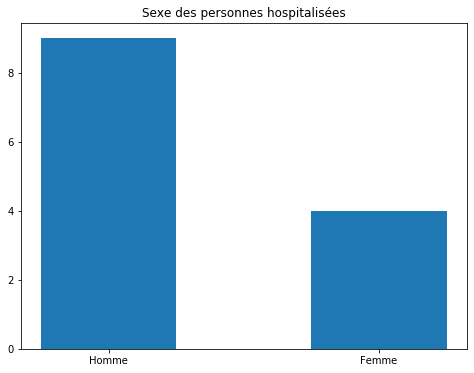

In [64]:
plt.figure(figsize=(8,6))
plt.bar(["Homme", "Femme"], df[['Homme', 'Femme']].dropna().sum(), width=0.5)
plt.title("Sexe des personnes hospitalisées")
plt.show()

## 4. Ville du cas

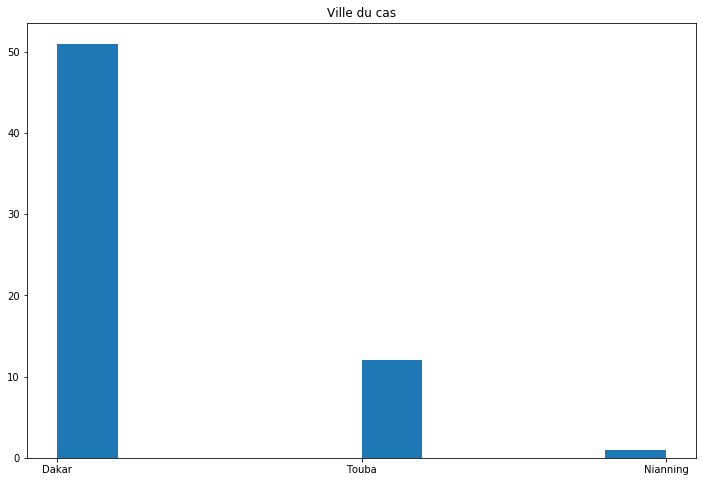

In [70]:
plt.figure(figsize=(12,8))
plt.hist(df['Ville'].dropna())
plt.title("Ville du cas")
plt.show()

## 5. Resident au Senegal

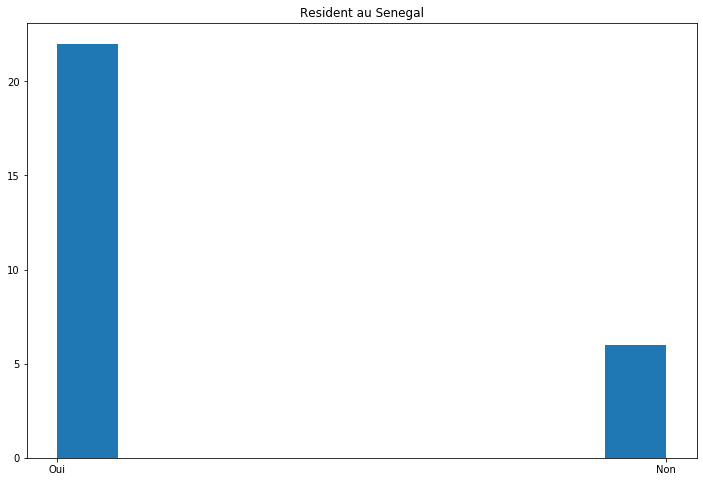

In [69]:
plt.figure(figsize=(12,8))
plt.hist(df['Resident Senegal'].dropna())
plt.title("Resident au Senegal")
plt.show()

## 6. Facteur de contamination

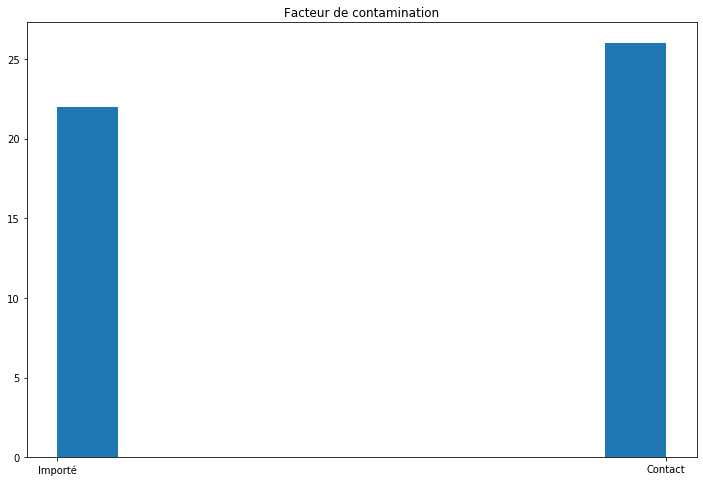

In [71]:
plt.figure(figsize=(12,8))
plt.hist(df['Facteur'].dropna())
plt.title("Facteur de contamination")
plt.show()

## 7. Source/Voyage

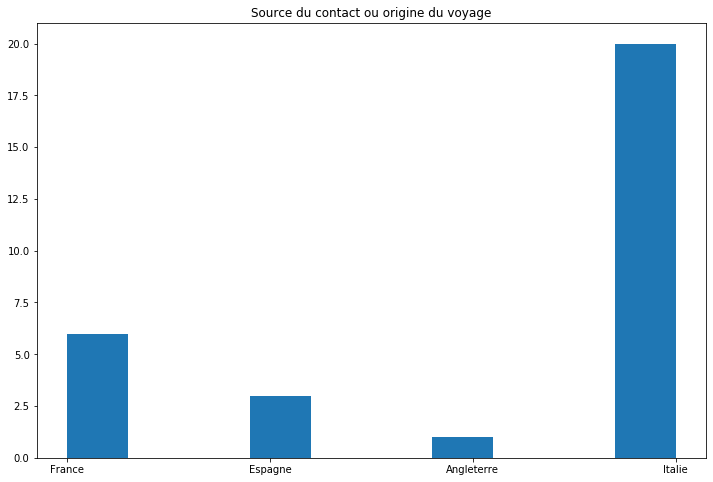

In [72]:
plt.figure(figsize=(12,8))
plt.hist(df['Source/Voyage'].dropna())
plt.title("Source du contact ou origine du voyage")
plt.show()

## 7. Source/Voyage

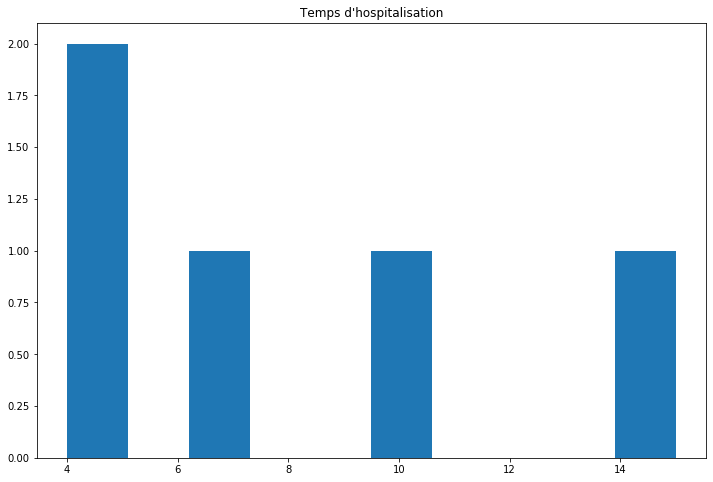

In [73]:
plt.figure(figsize=(12,8))
plt.hist(df['Temps Hospitalisation (j)'].dropna())
plt.title("Temps d'hospitalisation")
plt.show()